<a href="https://colab.research.google.com/github/fabianhuertas1992/DatosML/blob/main/DeepForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias y concexión a Drive

In [1]:
!pip install deepforest
!pip install pytorch_lightning --quiet

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.6/22.6 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.4/447.4 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.4/587.4 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 32.8 MB/s eta 0:00:00
   ━━

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Entrenamiento con anotaciones e Imagenes

In [ ]:
# @title Entrenamiento con anotaciones e Imagenes
from deepforest import main
from deepforest import utilities
import pytorch_lightning as pl

# Inicializa el modelo
model = main.deepforest()

# Usa el modelo preentrenado para hacer fine-tuning
model.use_release()

# Definir tu CSV de anotaciones con las coordenadas de las copas de árboles
annotations_path = "/content/drive/MyDrive/Nestor_RGB/anotaciones_nestor.csv"  # Reemplaza con la ruta a tu archivo CSV

# Configurar el entrenamiento (ajuste fino)
model.config["train"]["csv_file"] = annotations_path  # Anotaciones
model.config["train"]["root_dir"] = "/content/drive/MyDrive/Nestor_RGB/Img"  # Directorio de imágenes
model.config["train"]["epochs"] = 10  # Número de épocas de entrenamiento
model.config["train"]["batch_size"] = 2  # Tamaño del batch
model.config["gpus"] = 1  # Si estás en Colab con GPU

# Entrenar el modelo
trainer = pl.Trainer(accelerator="gpu", devices=1, max_epochs=model.config["train"]["epochs"])
trainer.fit(model)

In [ ]:
# @title Guardar el Modelo entrenado
import torch

# Guardar el modelo entrenado
torch.save(model.model.state_dict(), "/content/drive/MyDrive/Nestor_RGB/modelo_finetuned.pth")


# Uso del modelo entrenado para hacer predicciones

In [3]:
# @title Iniciar el modelo Preentrenado
from deepforest import main
import torch

# Cargar el modelo DeepForest y los pesos
model = main.deepforest()
model.use_release()  # Carga el modelo preentrenado

# Cargar los pesos entrenados
model.model.load_state_dict(torch.load("/content/drive/MyDrive/Nestor_RGB/modelo_finetuned.pth"))

# Verifica que el modelo esté en modo evaluación
model.model.eval()

# Confirma que los pesos están cargados
print("Pesos cargados correctamente")

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.20 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth
100%|██████████| 130M/130M [00:01<00:00, 134MB/s]
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


config.json:   0%|          | 0.00/235 [00:00<?, ?B/s]

Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


model.safetensors:   0%|          | 0.00/129M [00:00<?, ?B/s]

Pesos cargados correctamente


In [4]:
# @title Mirar el tamaño de la imagen
from PIL import Image

# Ruta de la imagen
image_path = "/content/drive/MyDrive/Nestor_RGB/Img/Nestor Macias RGB_7_3800_9024_7800_13024.png"
image = Image.open(image_path)

# Obtener el tamaño de la imagen
width, height = image.size

# Mostrar el tamaño en píxeles
print(f"El tamaño de la imagen es: {width} píxeles de ancho y {height} píxeles de alto.")


El tamaño de la imagen es: 4000 píxeles de ancho y 4000 píxeles de alto.


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


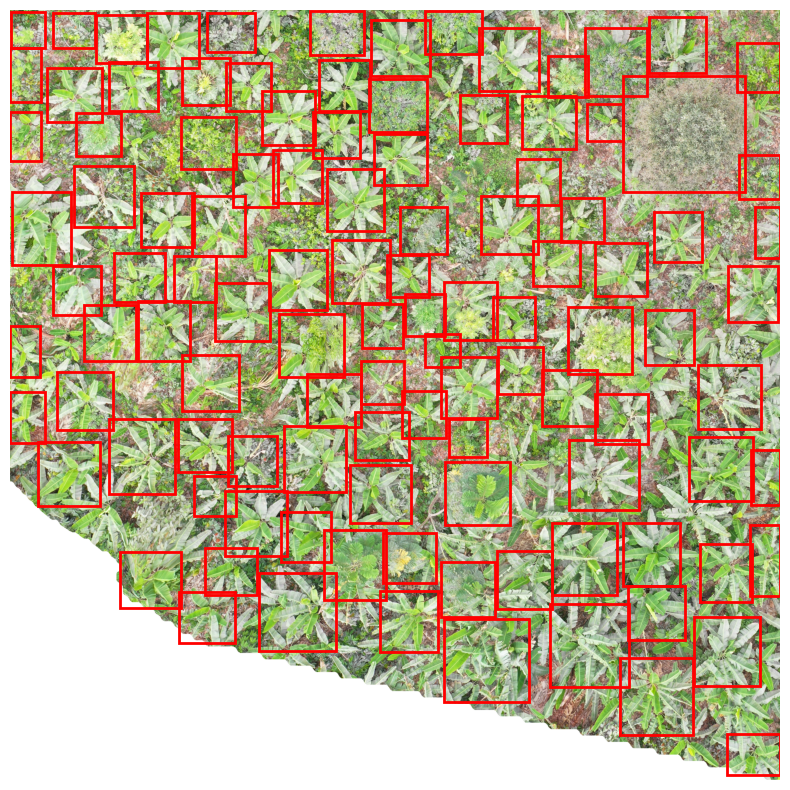

In [5]:
# @title Predicción sobre una imagen con modelo entrenado
from deepforest import main
import torch
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Inicializar el modelo DeepForest
model = main.deepforest()

# Cargar el modelo preentrenado de DeepForest para obtener la arquitectura
model.use_release()

# Cargar los pesos entrenados previamente
model.model.load_state_dict(torch.load("/content/drive/MyDrive/Nestor_RGB/modelo_finetuned.pth"))

# Configurar el umbral de predicción en el modelo
model.config["score_threshold"] = 0.5  # Ajustar el umbral para detectar más copas

# Ruta de la imagen a analizar
image_path = "/content/drive/MyDrive/Nestor_RGB/Img/Nestor Macias RGB_7_3800_9024_7800_13024.png"

# Predecir las copas de los árboles en la imagen con el modelo entrenado
predictions = model.predict_image(path=image_path)

# Verifica si se obtuvieron predicciones
if predictions is None:
    print("No se detectaron copas de árboles.")
else:
    # Cargar la imagen original
    image = Image.open(image_path)

    # Crear la figura y el eje para la visualización
    fig, ax = plt.subplots(1, figsize=(10, 10))

    # Mostrar la imagen original
    ax.imshow(image)

    # Dibujar rectángulos alrededor de las copas predichas
    for index, row in predictions.iterrows():
        # Crear un rectángulo en las coordenadas (xmin, ymin) con ancho y alto
        rect = patches.Rectangle(
            (row['xmin'], row['ymin']),  # Coordenadas de la esquina superior izquierda
            row['xmax'] - row['xmin'],   # Ancho del rectángulo
            row['ymax'] - row['ymin'],   # Alto del rectángulo
            linewidth=2,                 # Grosor del borde del rectángulo
            edgecolor='r',               # Color rojo para los rectángulos
            facecolor='none'             # Sin relleno
        )
        # Añadir el rectángulo a la imagen
        ax.add_patch(rect)

    # Mostrar la imagen con las detecciones
    plt.axis('off')  # Para ocultar los ejes
    plt.show()


# Analisis Imagen .tif

In [6]:
# @title Bandas de imagen .tif
import rasterio

# Ruta de la imagen .tif
image_path_tif = "/content/drive/MyDrive/Nestor_RGB/Nestor Macias RGB.tif"

# Abrir la imagen .tif con rasterio
with rasterio.open(image_path_tif) as src:
    # Número de bandas
    num_bandas = src.count
    print(f"Número de bandas: {num_bandas}")

    # Imprimir información de cada banda
    for i in range(1, num_bandas + 1):
        # Leer la descripción de la banda (si está disponible)
        desc = src.descriptions[i-1] if src.descriptions[i-1] else f"Banda {i}"

        # Obtener el tipo de datos de la banda
        dtype = src.dtypes[i-1]

        # Obtener la estadística de valores mínimos y máximos de la banda
        min_val, max_val = src.read(i).min(), src.read(i).max()

        print(f"{desc}: Tipo de datos = {dtype}, Valor mínimo = {min_val}, Valor máximo = {max_val}")


Número de bandas: 4
Banda 1: Tipo de datos = uint8, Valor mínimo = 0, Valor máximo = 255
Banda 2: Tipo de datos = uint8, Valor mínimo = 1, Valor máximo = 255
Banda 3: Tipo de datos = uint8, Valor mínimo = 0, Valor máximo = 255
Banda 4: Tipo de datos = uint8, Valor mínimo = 0, Valor máximo = 255


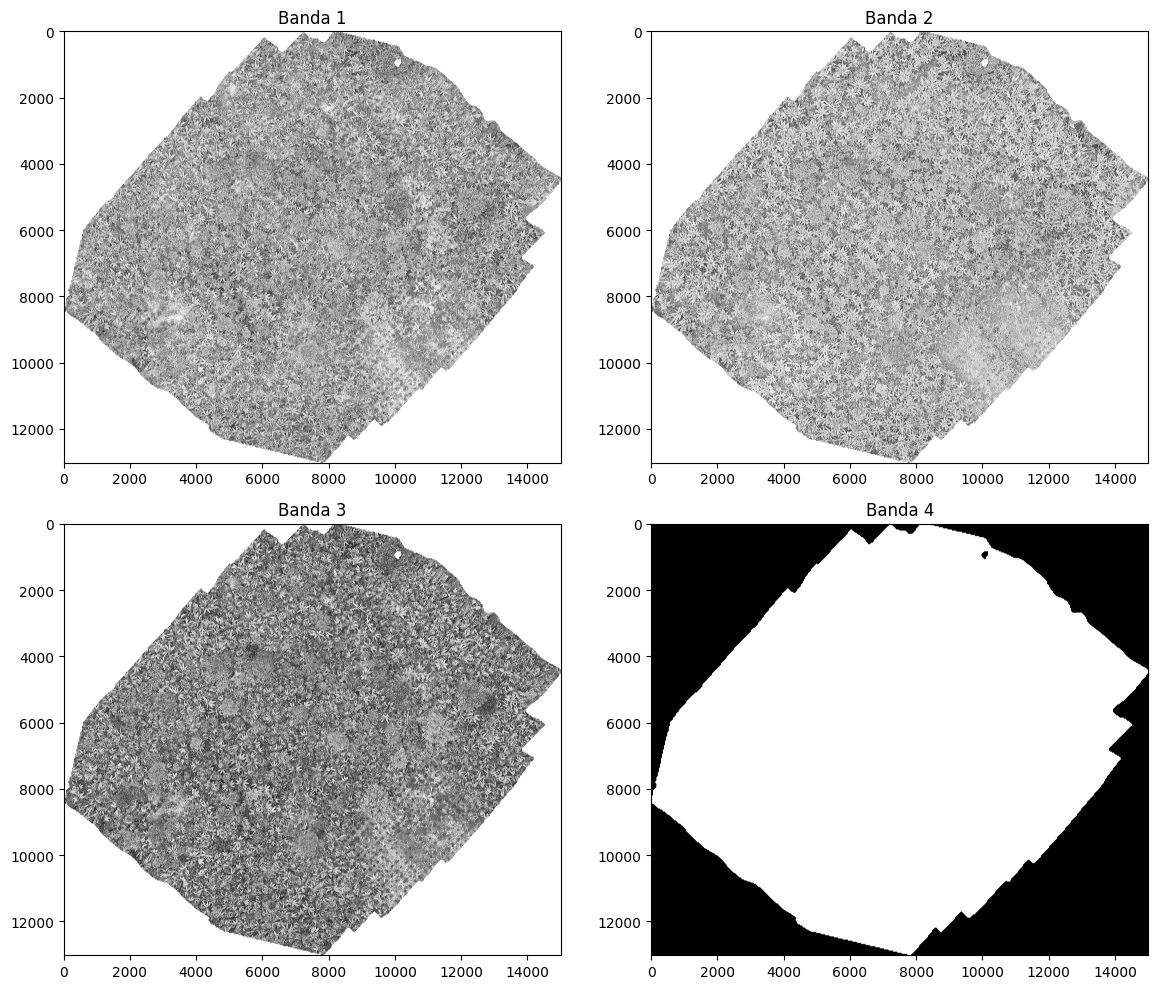

In [7]:
# @title Reconocer las bandas de la imagen
# Banda 1: Azul
# Banda 2: Verde
# Banda 3: Rojo
# Banda 4: NIR

import matplotlib.pyplot as plt
import rasterio

# Ruta de la imagen .tif
image_path_tif = "/content/drive/MyDrive/Nestor_RGB/Nestor Macias RGB.tif"

# Abrir la imagen .tif con rasterio
with rasterio.open(image_path_tif) as src:
    # Leer cada banda
    banda_1 = src.read(1)
    banda_2 = src.read(2)
    banda_3 = src.read(3)
    banda_4 = src.read(4)

    # Visualizar cada banda por separado
    fig, ax = plt.subplots(2, 2, figsize=(12, 10))

    ax[0, 0].imshow(banda_1, cmap='gray')
    ax[0, 0].set_title('Banda 1')

    ax[0, 1].imshow(banda_2, cmap='gray')
    ax[0, 1].set_title('Banda 2')

    ax[1, 0].imshow(banda_3, cmap='gray')
    ax[1, 0].set_title('Banda 3')

    ax[1, 1].imshow(banda_4, cmap='gray')
    ax[1, 1].set_title('Banda 4')

    plt.tight_layout()
    plt.show()


In [8]:
# @title Coordenadas imagen .tif
import rasterio

# Ruta de la imagen .tif
image_path_tif = "/content/drive/MyDrive/Nestor_RGB/Nestor Macias RGB.tif"

# Abrir la imagen .tif con rasterio
with rasterio.open(image_path_tif) as src:
    # Obtener el perfil de la imagen
    print("Perfil de la imagen:")
    print(src.profile)

    # Obtener las coordenadas de las esquinas de la imagen
    print("\nCoordenadas de las esquinas:")
    for corner, coord in src.bounds._asdict().items():
        print(f"{corner.capitalize()}: {coord}")

    # Obtener la transformación de coordenadas
    transform = src.transform
    print("\nTransformación de coordenadas:")
    print(transform)

    # Obtener el CRS (Sistema de Referencia de Coordenadas)
    crs = src.crs
    print("\nSistema de Referencia de Coordenadas (CRS):")
    print(crs)

    # Convertir las coordenadas de un píxel específico a coordenadas geográficas
    fila, columna = 0, 0  # Ejemplo: esquina superior izquierda
    lon, lat = src.xy(fila, columna)
    print(f"\nCoordenadas geográficas del píxel ({fila}, {columna}): ({lat}, {lon})")


Perfil de la imagen:
{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 15003, 'height': 13024, 'count': 4, 'crs': CRS.from_epsg(4326), 'transform': Affine(9.89515000001797e-08, 0.0, -79.57692454998987,
       0.0, -9.954520000000314e-08, -2.180546635301173), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}

Coordenadas de las esquinas:
Left: -79.57692454998987
Bottom: -2.181843111985973
Right: -79.57543998063537
Top: -2.180546635301173

Transformación de coordenadas:
| 0.00, 0.00,-79.58|
| 0.00,-0.00,-2.18|
| 0.00, 0.00, 1.00|

Sistema de Referencia de Coordenadas (CRS):
EPSG:4326

Coordenadas geográficas del píxel (0, 0): (-2.180546685073773, -79.57692450051412)


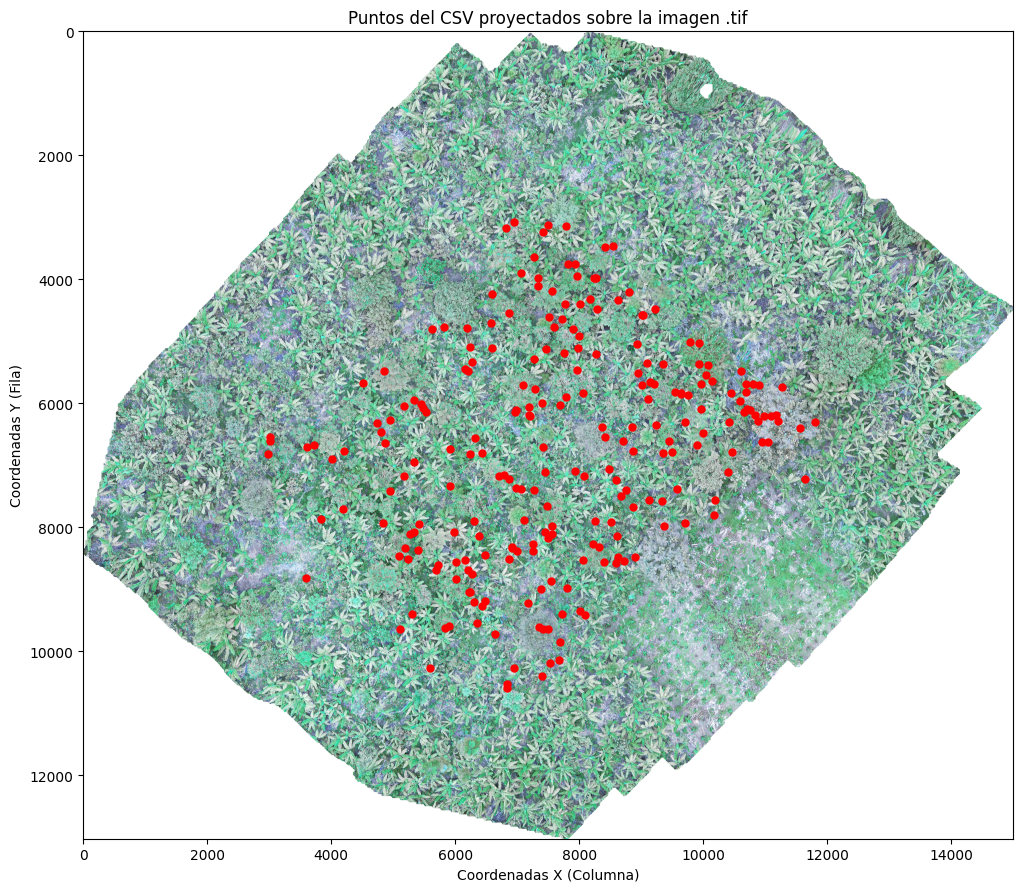

Total de puntos proyectados sobre la imagen: 238


In [9]:
# @title Ubicacion coordenadas csv en tif
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ruta de la imagen .tif
image_path_tif = "/content/drive/MyDrive/Nestor_RGB/Nestor Macias RGB.tif"

# Cargar la imagen .tif con rasterio
with rasterio.open(image_path_tif) as src:
    # Leer las bandas de la imagen (RGB)
    red = src.read(3)
    green = src.read(2)
    blue = src.read(1)

    # Crear una imagen RGB normalizada
    rgb_image_normalized = np.dstack((
        (red / red.max() * 255).astype(np.uint8),
        (green / green.max() * 255).astype(np.uint8),
        (blue / blue.max() * 255).astype(np.uint8)
    ))

    # Obtener la transformación de coordenadas
    transform = src.transform

# Cargar el archivo CSV
csv_path = '/content/drive/MyDrive/Nestor_RGB/field_data_Nestor.csv'
field_data = pd.read_csv(csv_path, sep=';', engine='python')

# Convertir las coordenadas del CSV a formato numérico
field_data['lat'] = field_data['lat'].str.replace(',', '.').astype(float)
field_data['lon'] = field_data['lon'].str.replace(',', '.').astype(float)

# Inicializar la figura de Matplotlib
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(rgb_image_normalized)

# Inicializar el contador de puntos
contador_puntos = 0

# Iterar sobre los puntos en el CSV y proyectarlos en la imagen
for index, row in field_data.iterrows():
    lat, lon = row['lat'], row['lon']

    # Convertir las coordenadas lat/lon a coordenadas de píxel en la imagen
    fila, columna = src.index(lon, lat)

    # Dibujar el punto en la imagen
    ax.plot(columna, fila, marker='o', markersize=5, color='red')

    # Incrementar el contador de puntos
    contador_puntos += 1

# Configurar el título y ejes de la imagen
ax.set_title("Puntos del CSV proyectados sobre la imagen .tif")
ax.set_xlabel("Coordenadas X (Columna)")
ax.set_ylabel("Coordenadas Y (Fila)")

# Mostrar la imagen con los puntos
plt.show()

# Imprimir el conteo total de puntos
print(f"Total de puntos proyectados sobre la imagen: {contador_puntos}")



Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


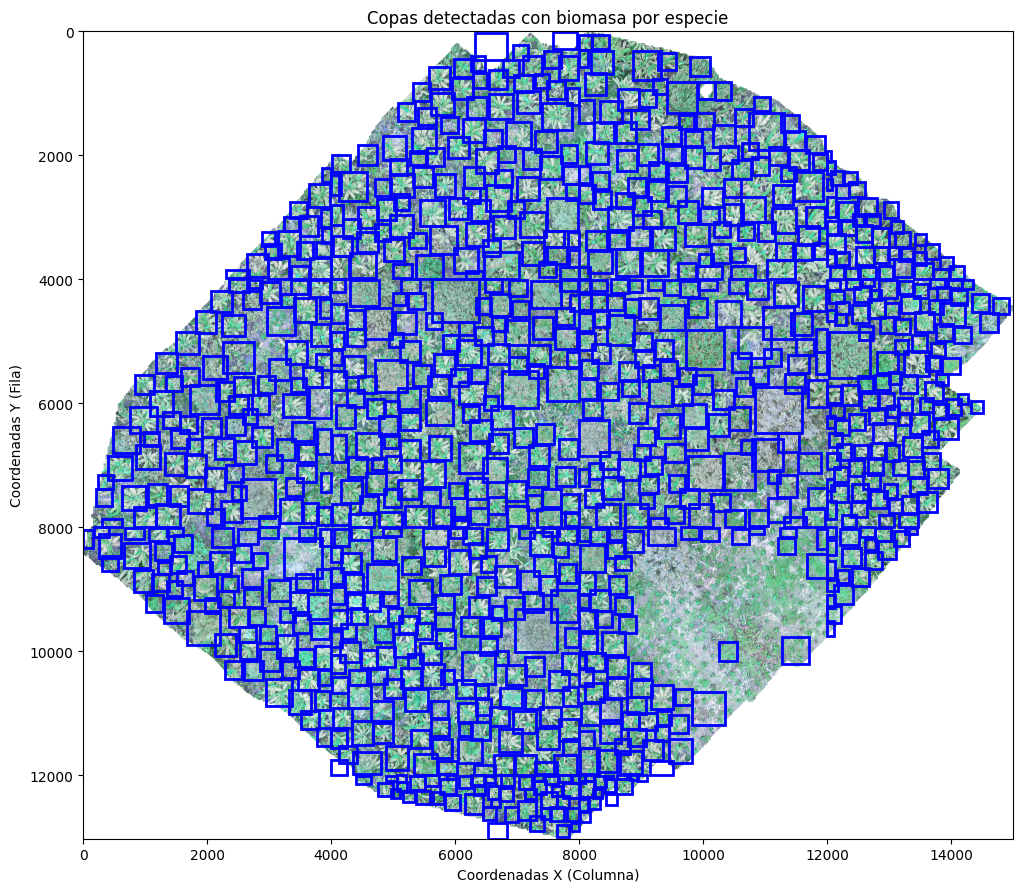

Total de copas detectadas: 926
Biomasa total estimada (AGB): 174316.91 kg

Biomasa total estimada por especie:
- banana: 33900.09 kg
- cacao: 3922.24 kg
- fruit: 5849.57 kg
- other: 4558.79 kg
- timber: 126086.23 kg


In [10]:
# @title Copas y biomasa estimada por especies (Funcion logaritmica general Estimada)
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from deepforest import main
import torch
import tempfile
import matplotlib.patches as patches
from PIL import Image
from math import exp, log
from geopy.distance import geodesic

# Ruta de la imagen .tif
image_path_tif = "/content/drive/MyDrive/Nestor_RGB/Nestor Macias RGB.tif"

# Cargar la imagen .tif con rasterio
with rasterio.open(image_path_tif) as src:
    # Leer las bandas de la imagen (RGB)
    red = src.read(3)
    green = src.read(2)
    blue = src.read(1)

    # Crear una imagen RGB normalizada
    rgb_image_normalized = np.dstack((
        (red / red.max() * 255).astype(np.uint8),
        (green / green.max() * 255).astype(np.uint8),
        (blue / blue.max() * 255).astype(np.uint8)
    ))

    # Obtener la transformación de coordenadas
    transform = src.transform

# Inicializar DeepForest y cargar el modelo preentrenado
model = main.deepforest()
model.use_release()
model.model.load_state_dict(torch.load("/content/drive/MyDrive/Nestor_RGB/modelo_finetuned.pth"))
model.config["score_threshold"] = 0.5  # Ajustar el umbral de confianza para la detección de copas

# Función para dividir la imagen en mosaicos de 4000x4000 píxeles
def dividir_imagen(imagen, tam_mosaico=4000):
    ancho, alto = imagen.shape[1], imagen.shape[0]
    mosaicos = []

    for i in range(0, ancho, tam_mosaico):
        for j in range(0, alto, tam_mosaico):
            caja = (i, j, min(i + tam_mosaico, ancho), min(j + tam_mosaico, alto))
            mosaico = imagen[j:caja[3], i:caja[2]]
            mosaicos.append((mosaico, caja))

    return mosaicos

# Función para calcular AGB usando ecuaciones alométricas logarítmicas
def calcular_agb_logaritmica(dap, a=-2.0, b=2.5):
    """Calcula la biomasa aérea usando una ecuación alométrica logarítmica."""
    if dap > 0:
        agb = exp(a + b * log(dap))
    else:
        agb = 0
    return agb

# Función para encontrar el DAP más cercano y la especie correspondiente usando el CSV
def encontrar_dap_y_especie(lat_copa, lon_copa, field_data):
    min_dist = float('inf')
    dap_cercano = 0
    especie = None

    # Iterar sobre cada fila en los datos de campo
    for _, row in field_data.iterrows():
        lat_arbol = row['lat']
        lon_arbol = row['lon']
        dap = row['updated diameter']
        tipo = row['group']

        # Calcular la distancia entre la copa detectada y el árbol del CSV
        distancia = geodesic((lat_copa, lon_copa), (lat_arbol, lon_arbol)).meters

        # Si la distancia es menor a la mínima encontrada, actualizar el DAP y la especie
        if distancia < min_dist:
            min_dist = distancia
            dap_cercano = dap
            especie = tipo

    return dap_cercano, especie

# Dividir la imagen en mosaicos de 4000x4000 píxeles
mosaicos = dividir_imagen(rgb_image_normalized, tam_mosaico=4000)

# Cargar el archivo CSV
csv_path = '/content/drive/MyDrive/Nestor_RGB/field_data_Nestor.csv'
field_data = pd.read_csv(csv_path, sep=';', engine='python')

# Convertir las coordenadas del CSV a formato numérico
field_data['lat'] = field_data['lat'].str.replace(',', '.').astype(float)
field_data['lon'] = field_data['lon'].str.replace(',', '.').astype(float)
field_data['updated diameter'] = field_data['updated diameter'].str.replace(',', '.').astype(float)

# Inicializar el contador de copas detectadas y la biomasa por especie
contador_copas = 0
biomasa_total = 0
biomasa_por_especie = {}

# Inicializar la figura de Matplotlib
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(rgb_image_normalized)

# Procesar cada mosaico para detectar copas y calcular la biomasa por especie
for mosaico, caja in mosaicos:
    # Guardar el mosaico en un archivo temporal
    with tempfile.NamedTemporaryFile(suffix=".png") as temp_img:
        Image.fromarray(mosaico).save(temp_img.name)

        # Realizar la predicción de copas en el mosaico
        predictions = model.predict_image(path=temp_img.name)

        # Iterar sobre las copas detectadas en el mosaico
        if predictions is not None and not predictions.empty:
            for index, row in predictions.iterrows():
                xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']

                # Calcular el área de la copa
                ancho = xmax - xmin
                alto = ymax - ymin
                area_copa = ancho * alto

                # Aproximar el DAP usando el área de la copa (relación DAP ~ sqrt(Área de copa))
                dap_aprox = np.sqrt(area_copa) / 100  # Conversión a cm

                # Convertir las coordenadas de la copa a coordenadas geográficas
                lon_copa, lat_copa = rasterio.transform.xy(transform, ymin + caja[1], xmin + caja[0], offset='center')

                # Encontrar el DAP más cercano y la especie correspondiente
                dap_cercano, especie = encontrar_dap_y_especie(lat_copa, lon_copa, field_data)

                # Calcular la biomasa usando la ecuación logarítmica
                agb_copa = calcular_agb_logaritmica(dap_cercano)

                # Sumar la biomasa total y por especie
                biomasa_total += agb_copa
                if especie in biomasa_por_especie:
                    biomasa_por_especie[especie] += agb_copa
                else:
                    biomasa_por_especie[especie] = agb_copa

                # Dibujar un rectángulo alrededor de la copa detectada
                rect = patches.Rectangle((xmin + caja[0], ymin + caja[1]), ancho, alto,
                                         linewidth=2, edgecolor='blue', facecolor='none')
                ax.add_patch(rect)

                # Incrementar el contador de copas
                contador_copas += 1

# Configurar el título y ejes de la imagen
ax.set_title("Copas detectadas con biomasa por especie")
ax.set_xlabel("Coordenadas X (Columna)")
ax.set_ylabel("Coordenadas Y (Fila)")

# Mostrar la imagen con las copas detectadas
plt.show()

# Imprimir el conteo total de copas detectadas y la biomasa total por especie
print(f"Total de copas detectadas: {contador_copas}")
print(f"Biomasa total estimada (AGB): {biomasa_total:.2f} kg")
print("\nBiomasa total estimada por especie:")
for especie, biomasa in biomasa_por_especie.items():
    print(f"- {especie}: {biomasa:.2f} kg")


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


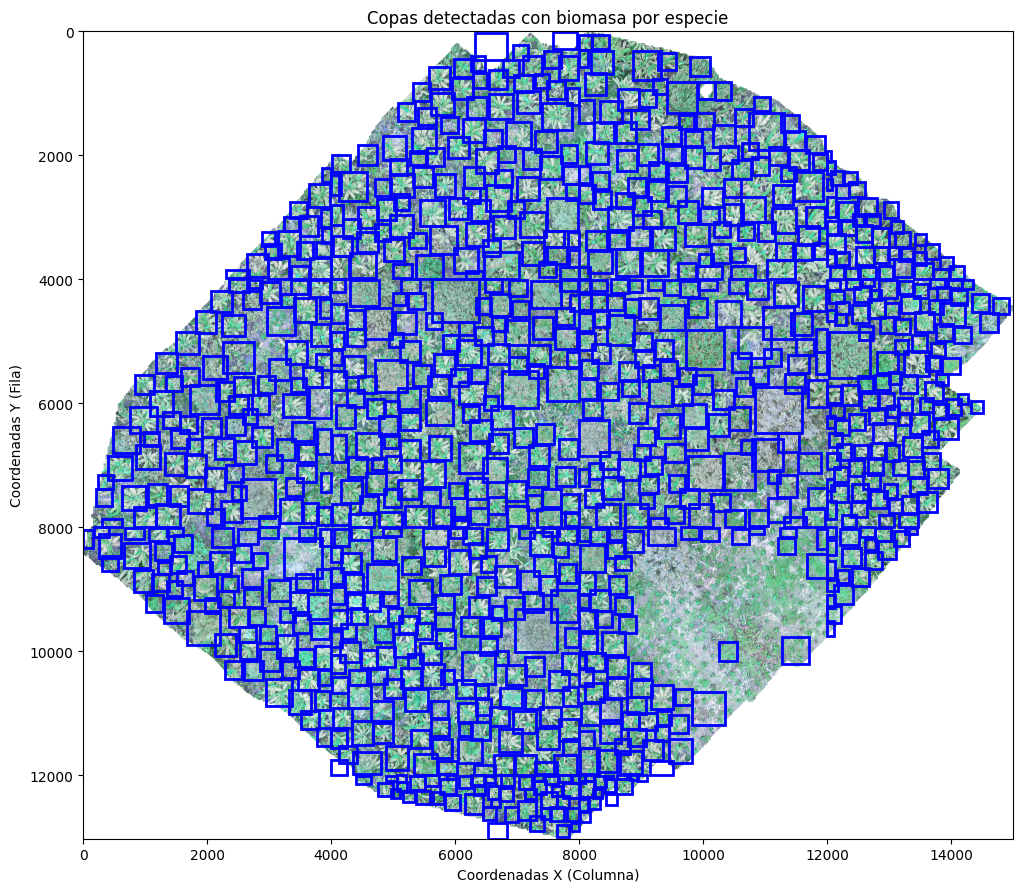

Total de copas detectadas: 926
Biomasa total estimada (AGB): 90801.14 kg

Biomasa total estimada por especie:
- banana: 2730.06 kg
- cacao: 1292.28 kg
- fruit: 3204.47 kg
- timber: 83574.33 kg
- other: 0.00 kg


In [11]:
# @title Copas y Biomasa Función logaritmoca por especie
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from deepforest import main
import torch
import tempfile
from PIL import Image
from geopy.distance import geodesic
import matplotlib.patches as patches

# Ruta de la imagen .tif del dron
image_path_tif = "/content/drive/MyDrive/Nestor_RGB/Nestor Macias RGB.tif"

# Cargar la imagen de dron con rasterio
with rasterio.open(image_path_tif) as src:
    red = src.read(3)
    green = src.read(2)
    blue = src.read(1)
    rgb_image_normalized = np.dstack((
        (red / red.max() * 255).astype(np.uint8),
        (green / green.max() * 255).astype(np.uint8),
        (blue / blue.max() * 255).astype(np.uint8)
    ))
    transform = src.transform

# Inicializar DeepForest y cargar el modelo preentrenado
model = main.deepforest()
model.use_release()
model.model.load_state_dict(torch.load("/content/drive/MyDrive/Nestor_RGB/modelo_finetuned.pth"))
model.config["score_threshold"] = 0.5

# Función para dividir la imagen en mosaicos de 4000x4000 píxeles
def dividir_imagen(imagen, tam_mosaico=4000):
    ancho, alto = imagen.shape[1], imagen.shape[0]
    mosaicos = []
    for i in range(0, ancho, tam_mosaico):
        for j in range(0, alto, tam_mosaico):
            caja = (i, j, min(i + tam_mosaico, ancho), min(j + tam_mosaico, alto))
            mosaico = imagen[j:caja[3], i:caja[2]]
            mosaicos.append((mosaico, caja))
    return mosaicos

# Función para calcular AGB usando ecuaciones específicas por especie
def calcular_agb_por_especie(dap, especie):
    especie = especie.lower().strip()  # Normalizar nombre de especie
    if especie == 'banana':
        agb = 0.030 * (dap ** 2.13)
    elif especie == 'cacao':
        agb = 0.1208 * (dap ** 1.98)
    elif especie == 'fruit':
        agb = 0.1466 * (dap ** 2.223)
    elif especie == 'timber':
        agb = 21.3 - 6.95 * dap + 0.74 * (dap ** 2)
    else:
        agb = 0  # Si no se reconoce la especie
    return agb

# Función para encontrar el DAP más cercano y la especie correspondiente usando el CSV
def encontrar_dap_y_especie(lat_copa, lon_copa, field_data):
    min_dist = float('inf')
    dap_cercano = 0
    especie = None

    # Iterar sobre cada fila en los datos de campo
    for _, row in field_data.iterrows():
        lat_arbol = row['lat']
        lon_arbol = row['lon']
        dap = row['updated diameter']
        tipo = row['group'].strip().lower()  # Normalizar tipo

        # Calcular la distancia entre la copa detectada y el árbol del CSV
        distancia = geodesic((lat_copa, lon_copa), (lat_arbol, lon_arbol)).meters

        # Si la distancia es menor a la mínima encontrada, actualizar el DAP y la especie
        if distancia < min_dist:
            min_dist = distancia
            dap_cercano = dap
            especie = tipo

    return dap_cercano, especie

# Dividir la imagen en mosaicos de 4000x4000 píxeles
mosaicos = dividir_imagen(rgb_image_normalized, tam_mosaico=4000)

# Cargar el archivo CSV
csv_path = '/content/drive/MyDrive/Nestor_RGB/field_data_Nestor.csv'
field_data = pd.read_csv(csv_path, sep=';', engine='python')

# Convertir las coordenadas del CSV a formato numérico
field_data['lat'] = field_data['lat'].str.replace(',', '.').astype(float)
field_data['lon'] = field_data['lon'].str.replace(',', '.').astype(float)
field_data['updated diameter'] = field_data['updated diameter'].str.replace(',', '.').astype(float)

# Inicializar el contador de copas detectadas y la biomasa por especie
contador_copas = 0
biomasa_total = 0
biomasa_por_especie = {'banana': 0, 'cacao': 0, 'fruit': 0, 'timber': 0, 'other': 0}

# Inicializar la figura de Matplotlib
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(rgb_image_normalized)

# Procesar cada mosaico para detectar copas y calcular la biomasa por especie
for mosaico, caja in mosaicos:
    # Guardar el mosaico en un archivo temporal
    with tempfile.NamedTemporaryFile(suffix=".png") as temp_img:
        Image.fromarray(mosaico).save(temp_img.name)

        # Realizar la predicción de copas en el mosaico
        predictions = model.predict_image(path=temp_img.name)

        # Iterar sobre las copas detectadas en el mosaico
        if predictions is not None and not predictions.empty:
            for index, row in predictions.iterrows():
                xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']

                # Calcular el área de la copa
                ancho = xmax - xmin
                alto = ymax - ymin
                area_copa = ancho * alto

                # Aproximar el DAP usando el área de la copa (relación DAP ~ sqrt(Área de copa))
                dap_aprox = np.sqrt(area_copa) / 100  # Conversión a cm

                # Convertir las coordenadas de la copa a coordenadas geográficas
                lon_copa, lat_copa = rasterio.transform.xy(transform, ymin + caja[1], xmin + caja[0], offset='center')

                # Encontrar el DAP más cercano y la especie correspondiente
                dap_cercano, especie = encontrar_dap_y_especie(lat_copa, lon_copa, field_data)

                # Calcular la biomasa usando la ecuación específica de la especie
                agb_copa = calcular_agb_por_especie(dap_cercano, especie)

                # Sumar la biomasa total y por especie
                biomasa_total += agb_copa
                if especie in biomasa_por_especie:
                    biomasa_por_especie[especie] += agb_copa
                else:
                    biomasa_por_especie['other'] += agb_copa

                # Dibujar un rectángulo alrededor de la copa detectada
                rect = patches.Rectangle((xmin + caja[0], ymin + caja[1]), ancho, alto,
                                         linewidth=2, edgecolor='blue', facecolor='none')
                ax.add_patch(rect)

                # Incrementar el contador de copas
                contador_copas += 1

# Configurar el título y ejes de la imagen
ax.set_title("Copas detectadas con biomasa por especie")
ax.set_xlabel("Coordenadas X (Columna)")
ax.set_ylabel("Coordenadas Y (Fila)")

# Mostrar la imagen con las copas detectadas
plt.show()

# Imprimir el conteo total de copas detectadas y la biomasa total por especie
print(f"Total de copas detectadas: {contador_copas}")
print(f"Biomasa total estimada (AGB): {biomasa_total:.2f} kg")
print("\nBiomasa total estimada por especie:")
for especie, biomasa in biomasa_por_especie.items():
    print(f"- {especie}: {biomasa:.2f} kg")


In [ ]:
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from deepforest import main
import torch
import tempfile
from PIL import Image
from geopy.distance import geodesic
import matplotlib.patches as patches
from math import exp, log

# Ruta de la imagen .tif del dron
image_path_tif = "/content/drive/MyDrive/Nestor_RGB/Nestor Macias RGB.tif"

# Cargar la imagen de dron con rasterio
with rasterio.open(image_path_tif) as src:
    red = src.read(3)
    green = src.read(2)
    blue = src.read(1)
    rgb_image_normalized = np.dstack((
        (red / red.max() * 255).astype(np.uint8),
        (green / green.max() * 255).astype(np.uint8),
        (blue / blue.max() * 255).astype(np.uint8)
    ))
    transform = src.transform

# Inicializar DeepForest y cargar el modelo preentrenado
model = main.deepforest()
model.use_release()
model.model.load_state_dict(torch.load("/content/drive/MyDrive/Nestor_RGB/modelo_finetuned.pth"))
model.config["score_threshold"] = 0.5

# Función para dividir la imagen en mosaicos de 4000x4000 píxeles
def dividir_imagen(imagen, tam_mosaico=4000):
    ancho, alto = imagen.shape[1], imagen.shape[0]
    mosaicos = []
    for i in range(0, ancho, tam_mosaico):
        for j in range(0, alto, tam_mosaico):
            caja = (i, j, min(i + tam_mosaico, ancho), min(j + tam_mosaico, alto))
            mosaico = imagen[j:caja[3], i:caja[2]]
            mosaicos.append((mosaico, caja))
    return mosaicos

# Función para calcular AGB usando ecuaciones específicas por especie
def calcular_agb_por_especie(dap, especie):
    especie = especie.lower().strip()
    if especie == 'banana':
        agb = 0.030 * (dap ** 2.13)
    elif especie == 'cacao':
        agb = 0.1208 * (dap ** 1.98)
    elif especie == 'fruit':
        agb = 0.1466 * (dap ** 2.223)
    elif especie == 'timber':
        agb = 21.3 - 6.95 * dap + 0.74 * (dap ** 2)
    else:
        # Usar la fórmula logarítmica general para especies no especificadas
        a = -2.0  # Coeficiente ajustable
        b = 2.5   # Coeficiente ajustable
        agb = exp(a + b * log(dap))
    return agb

# Cargar el archivo CSV
csv_path = '/content/drive/MyDrive/Nestor_RGB/field_data_Nestor.csv'
field_data = pd.read_csv(csv_path, sep=';', engine='python')

# Convertir las coordenadas del CSV a formato numérico
field_data['lat'] = field_data['lat'].str.replace(',', '.').astype(float)
field_data['lon'] = field_data['lon'].str.replace(',', '.').astype(float)
field_data['updated diameter'] = field_data['updated diameter'].str.replace(',', '.').astype(float)

# Inicializar el contador de copas detectadas y la biomasa por especie
contador_copas = 0
biomasa_total = 0
biomasa_por_especie = {'banana': 0, 'cacao': 0, 'fruit': 0, 'timber': 0, 'other': 0}

# Inicializar la figura de Matplotlib
fig, ax = plt.subplots(figsize=(12, 12))
ax.imshow(rgb_image_normalized)

# Dividir la imagen en mosaicos de 4000x4000 píxeles
mosaicos = dividir_imagen(rgb_image_normalized, tam_mosaico=4000)

# Procesar cada mosaico para detectar copas y calcular la biomasa por especie
for mosaico, caja in mosaicos:
    # Guardar el mosaico en un archivo temporal
    with tempfile.NamedTemporaryFile(suffix=".png") as temp_img:
        Image.fromarray(mosaico).save(temp_img.name)

        # Realizar la predicción de copas en el mosaico
        predictions = model.predict_image(path=temp_img.name)

        # Iterar sobre las copas detectadas en el mosaico
        if predictions is not None and not predictions.empty:
            for index, row in predictions.iterrows():
                xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']

                # Calcular el área de la copa
                ancho = xmax - xmin
                alto = ymax - ymin
                area_copa = ancho * alto

                # Aproximar el DAP usando el área de la copa (relación DAP ~ sqrt(Área de copa))
                dap_aprox = np.sqrt(area_copa) / 100  # Conversión a cm

                # Convertir las coordenadas de la copa a coordenadas geográficas
                lon_copa, lat_copa = rasterio.transform.xy(transform, ymin + caja[1], xmin + caja[0], offset='center')

                # Encontrar el DAP más cercano y la especie correspondiente
                dap_cercano, especie = encontrar_dap_y_especie(lat_copa, lon_copa, field_data)

                # Calcular la biomasa usando la ecuación específica de la especie o logarítmica general
                agb_copa = calcular_agb_por_especie(dap_cercano, especie)

                # Sumar la biomasa total y por especie
                biomasa_total += agb_copa
                if especie in biomasa_por_especie:
                    biomasa_por_especie[especie] += agb_copa
                else:
                    biomasa_por_especie['other'] += agb_copa

                # Dibujar un rectángulo alrededor de la copa detectada
                rect = patches.Rectangle((xmin + caja[0], ymin + caja[1]), ancho, alto,
                                         linewidth=2, edgecolor='blue', facecolor='none')
                ax.add_patch(rect)

                # Incrementar el contador de copas
                contador_copas += 1

# Configurar el título y ejes de la imagen
ax.set_title("Copas detectadas con biomasa por especie")
ax.set_xlabel("Coordenadas X (Columna)")
ax.set_ylabel("Coordenadas Y (Fila)")

# Mostrar la imagen con las copas detectadas
plt.show()

# Imprimir el conteo total de copas detectadas y la biomasa total por especie
print(f"Total de copas detectadas: {contador_copas}")
print(f"Biomasa total estimada (AGB): {biomasa_total:.2f} kg")
print("\nBiomasa total estimada por especie:")
for especie, biomasa in biomasa_por_especie.items():
    print(f"- {especie}: {biomasa:.2f} kg")


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Reading config file: /usr/local/lib/python3.10/dist-packages/deepforest/data/deepforest_config.yml


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
